# -------------k-means clustering is written by hadi with love-------------------

## ----------------------------------import -----------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

## ----------------------------------read data -----------------------------------------------------

In [18]:
cust_df = pd.read_csv("servey.csv")
cust_df.head()

,Respondent Number,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,1,6,2,4,3,1,5,5,3,4,...,2,4,5,4,5,3,4,4,4,2
1,2,7,7,7,5,4,4,5,4,5,...,1,1,1,1,5,4,3,5,4,5
2,3,5,4,6,5,7,5,3,5,4,...,3,5,6,3,4,4,5,3,4,4
3,4,4,2,5,4,2,4,5,4,3,...,3,5,4,4,4,2,5,5,5,3
4,5,5,5,7,6,7,3,4,5,4,...,6,4,5,5,4,5,4,3,4,5


## ----------------------------------data cleaning -----------------------------------------------------

In [3]:
df = cust_df.drop('Respondent Number', axis=1)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
0,6,2,4,3,1,5,5,3,4,4,...,2,4,5,4,5,3,4,4,4,2
1,7,7,7,5,4,4,5,4,5,5,...,1,1,1,1,5,4,3,5,4,5
2,5,4,6,5,7,5,3,5,4,5,...,3,5,6,3,4,4,5,3,4,4
3,4,2,5,4,2,4,5,4,3,4,...,3,5,4,4,4,2,5,5,5,3
4,5,5,7,6,7,3,4,5,4,2,...,6,4,5,5,4,5,4,3,4,5


## ----------------------------------pre-processing -----------------------------------------------------

In [4]:
# we change NaN to number for modeling
from sklearn.preprocessing import StandardScaler
X = df.values[:,:]
X = np.nan_to_num(X)

# this way, we standardize data for equalifiying 
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.58659625, -1.05009144, -0.34514518, ...,  0.16593271,
         0.24795029, -1.28828394],
       [ 1.23836986,  1.49867419,  1.98691686, ...,  0.89370777,
         0.24795029,  1.02323031],
       [-0.06517736, -0.03058519,  1.20956285, ..., -0.56184234,
         0.24795029,  0.25272556],
       ...,
       [ 0.58659625,  0.47916794, -1.1224992 , ..., -2.01739245,
        -1.30173903, -1.28828394],
       [-1.36872458, -0.54033831,  1.20956285, ...,  0.89370777,
         1.02279495, -0.51777919],
       [ 1.23836986,  0.98892106, -1.1224992 , ...,  0.89370777,
        -0.52689437,  1.79373506]])

## ---------------------------------------modeling -------------------------------------------------------------

In [5]:
# finding elbow (the best k for k-means)
SE =[]
for i in range(1, 11):
    
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)

# calculates squared error for the clustered points
    SE.append(KM.inertia_)


E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

## -------------------------------ploting elbow-----------------------------------------

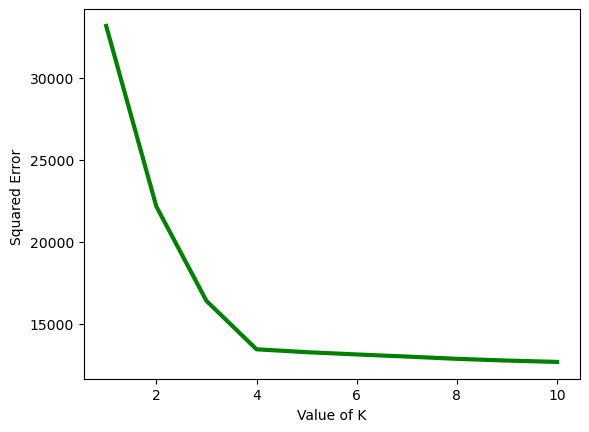

In [6]:
    
# plot the cost against K values
plt.plot(range(1, 11), SE, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error ")
plt.show() # clear the plot

# the point of the elbow is the
# most optimal value for choosing k

## ------------------------- Labels and errors --------------------------------

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 200 , max_iter = 500)
k_means.fit(X)
labels = k_means.labels_
print(k_means.inertia_)
print(labels)

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


13440.095160256411
[0 1 2 0 2 1 1 1 3 0 1 2 3 0 1 0 1 0 1 3 2 2 1 2 2 3 2 0 0 0 2 1 0 0 2 2 2
 2 1 0 1 0 2 0 2 2 0 0 2 0 0 3 2 2 3 3 0 2 1 2 0 0 1 0 3 2 1 1 0 1 1 0 3 2
 1 0 0 2 0 0 1 2 1 1 2 1 0 1 3 2 0 3 2 0 2 1 0 0 1 3 2 2 2 1 3 1 0 2 1 1 2
 3 0 1 1 2 0 1 1 1 1 0 1 2 3 2 0 1 0 2 2 3 1 3 0 1 2 0 2 0 0 1 0 0 3 2 3 1
 1 1 1 0 1 1 1 3 1 1 0 0 0 2 1 1 1 1 1 2 1 3 1 3 1 1 2 1 0 0 2 2 3 0 2 3 2
 1 2 2 0 0 2 2 1 1 2 2 3 0 0 0 2 0 2 3 0 2 0 0 3 1 0 1 3 0 0 2 1 0 0 1 2 1
 2 1 1 1 1 3 0 0 0 0 3 0 2 0 0 1 1 3 0 1 2 0 1 1 2 3 2 1]


## --------------------------center of clustering ------------------------------

In [8]:
k_means.cluster_centers_

array([[3.97333333, 1.97333333, 4.01333333, 4.08      , 1.76      ,
        3.93333333, 3.93333333, 3.94666667, 3.92      , 3.93333333,
        3.96      , 4.17333333, 3.97333333, 5.98666667, 6.08      ,
        5.93333333, 6.09333333, 5.97333333, 6.        , 5.88      ,
        5.98666667, 6.02666667, 1.93333333, 1.8       , 2.06666667,
        1.97333333, 2.05333333, 2.        , 2.12      , 1.94666667,
        3.86666667, 4.18666667, 4.        , 4.02666667, 3.94666667,
        3.94666667, 4.02666667, 4.06666667, 3.92      , 3.88      ,
        3.96      , 4.01333333, 3.89333333, 3.82666667, 3.98666667,
        3.89333333, 3.84      , 4.05333333, 4.04      , 4.06666667,
        4.08      , 4.13333333, 4.24      , 4.08      , 4.14666667,
        3.86666667, 4.12      , 4.02666667, 4.09333333, 4.24      ,
        3.82666667, 3.88      ],
       [6.51282051, 6.51282051, 3.88461538, 4.02564103, 4.01282051,
        3.97435897, 4.02564103, 3.75641026, 4.07692308, 4.05128205,
        4.08974

## --------------------adding labels as a column and groupby------------------

In [9]:
df["Clus_km"] = labels
df.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Clus_km
0,6,2,4,3,1,5,5,3,4,4,...,4,5,4,5,3,4,4,4,2,0
1,7,7,7,5,4,4,5,4,5,5,...,1,1,1,5,4,3,5,4,5,1
2,5,4,6,5,7,5,3,5,4,5,...,5,6,3,4,4,5,3,4,4,2
3,4,2,5,4,2,4,5,4,3,4,...,5,4,4,4,2,5,5,5,3,0
4,5,5,7,6,7,3,4,5,4,2,...,4,5,5,4,5,4,3,4,5,2


In [10]:
df[df["Clus_km"] == 3]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Clus_km
8,6,4,6,1,3,4,4,4,3,4,...,4,3,4,6,7,6,2,2,2,3
12,7,4,4,1,3,5,4,4,5,4,...,4,3,3,7,7,6,1,2,1,3
19,6,3,5,2,3,3,3,5,6,6,...,2,4,4,7,7,6,2,2,2,3
25,7,4,4,2,4,4,4,4,4,3,...,5,4,5,7,7,6,1,1,2,3
51,7,2,4,2,5,5,5,4,4,5,...,4,1,3,6,6,7,1,2,1,3
54,7,3,5,2,4,5,4,5,5,4,...,4,5,2,6,7,6,2,1,1,3
55,6,5,4,2,5,4,3,4,2,2,...,3,5,5,7,7,6,1,1,2,3
64,7,3,4,2,5,4,2,3,3,4,...,4,3,4,6,7,7,2,1,2,3
72,6,3,5,1,4,5,5,4,4,5,...,2,4,5,6,6,6,1,1,2,3
88,6,4,3,2,4,3,4,5,5,5,...,3,5,3,7,7,7,1,1,2,3


In [11]:
df.groupby('Clus_km').mean()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,3.973333,1.973333,4.013333,4.080000,1.760000,3.933333,3.933333,3.946667,3.920000,3.933333,...,4.240000,4.080000,4.146667,3.866667,4.120000,4.026667,4.093333,4.240000,3.826667,3.880000
1,6.512821,6.512821,3.884615,4.025641,4.012821,3.974359,4.025641,3.756410,4.076923,4.051282,...,1.538462,1.461538,1.346154,1.384615,4.000000,4.076923,4.089744,4.141026,4.294872,4.076923
2,4.015385,3.769231,5.938462,6.015385,6.015385,3.969231,3.800000,4.107692,3.769231,3.815385,...,3.984615,3.800000,3.861538,3.953846,3.861538,4.092308,3.830769,3.907692,3.892308,3.969231
3,6.500000,3.562500,3.781250,1.500000,3.937500,4.218750,3.562500,3.843750,3.718750,3.750000,...,6.468750,3.843750,3.656250,4.125000,6.468750,6.562500,6.406250,1.500000,1.406250,1.593750


## ------------------------------------- what made u hadi :-)      !!!